In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


excel_file_path = r'C:\Users\user\Downloads\movies.xlsx'  

# Chargez le fichier Excel dans un DataFrame pandas
df = pd.read_excel(excel_file_path)

In [72]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       5      0  2009       696    7.8  1100000.0      1155    1778   
7445   535       5      0  2019       183    8.4   903000.0       162     743   
3045  6896       5      6  1997       704    7.8  1100000.0      1155    1778   
6663  5144       5      0  2015       698    7.8   876000.0      1125    2550   
7244   536       5      0  2018       192    8.4   897000.0       162     743   

      star  country     budget       gross  company  runtime  
5445  2334       55  237000000  2847246203     2253    162.0  
7445  2241       55  356000000  2797501328     1606    181.0  
3045  1595       55  200000000  2201647264     2253    194.0  
6663   524       55  245000000  2069521700     1540    138.0  
7244  2241       55  321000000  2048359754     1606    149.0

In [7]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [8]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [13]:
# Replace NaN values in the 'budget' column with 0 and convert the column to int64
df['budget'] = df['budget'].fillna(0).astype('int64')
# Replace NaN values in the 'gross' column with 0 and convert the column to int64
df['gross'] = df['gross'].fillna(0).astype('int64')


In [14]:
# Drop rows with NaN values in either the 'budget' or 'gross' columns
df = df.dropna(subset=['budget', 'gross'])
# Convert the 'budget' column to int64
df['budget'] = df['budget'].astype('int64')
# Convert the 'gross' column to int64
df['gross'] = df['gross'].astype('int64')


In [73]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       5      0  2009       696    7.8  1100000.0      1155    1778   
7445   535       5      0  2019       183    8.4   903000.0       162     743   
3045  6896       5      6  1997       704    7.8  1100000.0      1155    1778   
6663  5144       5      0  2015       698    7.8   876000.0      1125    2550   
7244   536       5      0  2018       192    8.4   897000.0       162     743   

      star  country     budget       gross  company  runtime  
5445  2334       55  237000000  2847246203     2253    162.0  
7445  2241       55  356000000  2797501328     1606    181.0  
3045  1595       55  200000000  2201647264     2253    194.0  
6663   524       55  245000000  2069521700     1540    138.0  
7244  2241       55  321000000  2048359754     1606    149.0

In [26]:
# Sort the DataFrame by the 'gross' column in descending order
# Note: The original DataFrame is not modified (inplace=False)
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [27]:
# Set the maximum number of rows to display in pandas output to None, displaying all rows

pd.set_option('display.max_rows', None)

In [74]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       5      0  2009       696    7.8  1100000.0      1155    1778   
7445   535       5      0  2019       183    8.4   903000.0       162     743   
3045  6896       5      6  1997       704    7.8  1100000.0      1155    1778   
6663  5144       5      0  2015       698    7.8   876000.0      1125    2550   
7244   536       5      0  2018       192    8.4   897000.0       162     743   

      star  country     budget       gross  company  runtime  
5445  2334       55  237000000  2847246203     2253    162.0  
7445  2241       55  356000000  2797501328     1606    181.0  
3045  1595       55  200000000  2201647264     2253    194.0  
6663   524       55  245000000  2069521700     1540    138.0  
7244  2241       55  321000000  2048359754     1606    149.0

In [29]:
# Remove duplicate values from the 'company' column, then sort them in descending order (duplicates typically refer to rows where all values across columns are identical)
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3698                              Zentropa Entertainments
1175                                 Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [30]:
df.drop_duplicates()

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
5652       Harry Potter and the Deathly Hallows: Part 1      PG-13  Adventure   
6

In [75]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       5      0  2009       696    7.8  1100000.0      1155    1778   
7445   535       5      0  2019       183    8.4   903000.0       162     743   
3045  6896       5      6  1997       704    7.8  1100000.0      1155    1778   
6663  5144       5      0  2015       698    7.8   876000.0      1125    2550   
7244   536       5      0  2018       192    8.4   897000.0       162     743   

      star  country     budget       gross  company  runtime  
5445  2334       55  237000000  2847246203     2253    162.0  
7445  2241       55  356000000  2797501328     1606    181.0  
3045  1595       55  200000000  2201647264     2253    194.0  
6663   524       55  245000000  2069521700     1540    138.0  
7244  2241       55  321000000  2048359754     1606    149.0

In [32]:
# Budget high correlation
# company high correlation

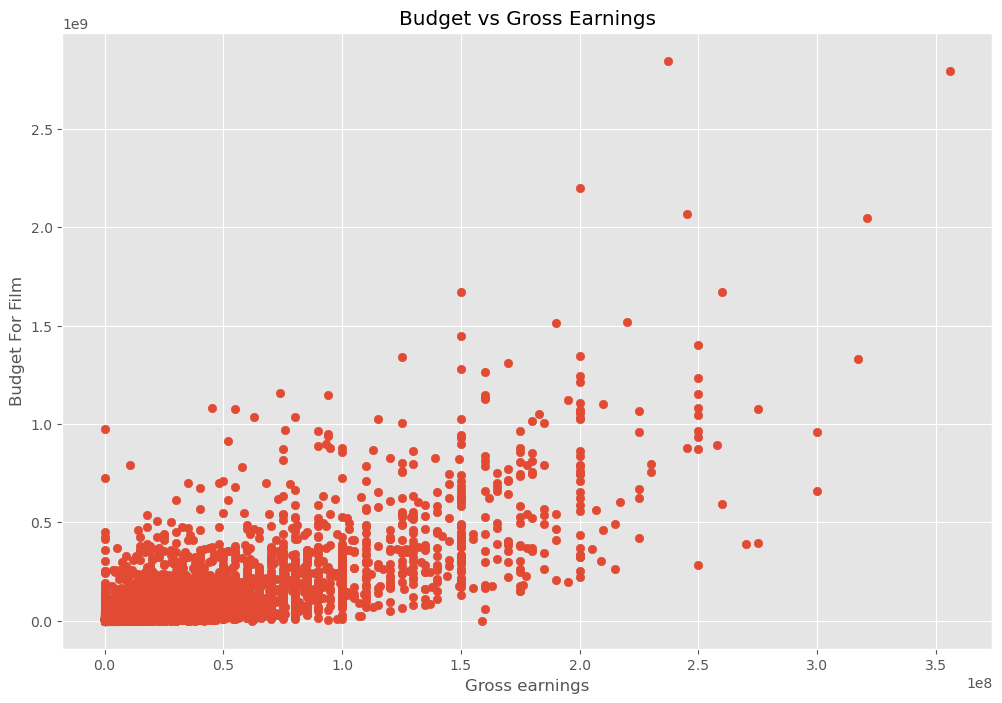

In [34]:
# Scatter plot with budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])
# Set the title of the plot
plt.title('Budget vs Gross Earnings')
# Set the label for the x-axis
plt.xlabel('Gross earnings')
# Set the label for the y-axis
plt.ylabel('Budget For Film')
# Display the plot
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

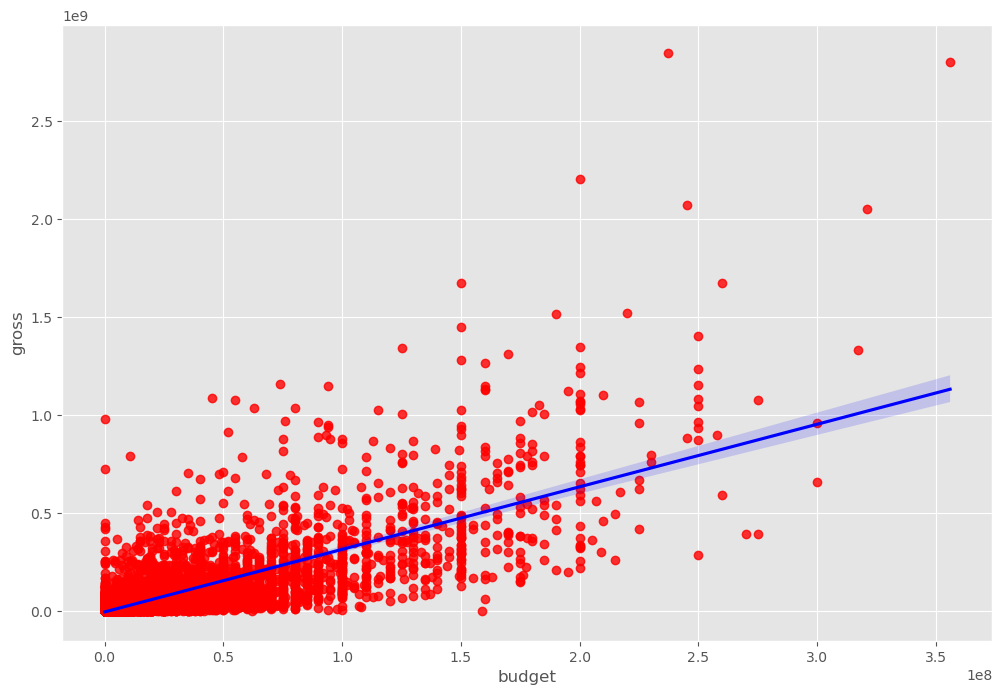

In [35]:
# Create a regression plot (scatter plot with a fitted regression line) of budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [36]:
# Let's start looking at the correlation


In [41]:
# In order to calculate the correlation matrix,we need to have only numerical values in columns(no strings)
# Select only the numeric columns (float64 and int64) in the DataFrame

numeric_df = df.select_dtypes(include=['float64', 'int64'])



In [44]:
# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_df.corr()


In [ ]:
# correlation_matrix

In [62]:
# Calculate the correlation matrix for the numeric columns using the Pearson correlation method
correlation_matrix = numeric_df.corr(method='pearson') #perason,kendall,spearman

In [63]:
correlation_matrix

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.309212  0.261900  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186392  0.399451
votes    0.222945  0.409182  1.000000  0.486862  0.632834  0.309212
budget   0.309212  0.055665  0.486862  1.000000  0.750157  0.269510
gross    0.261900  0.186392  0.632834  0.750157  1.000000  0.245235
runtime  0.120811  0.399451  0.309212  0.269510  0.245235  1.000000

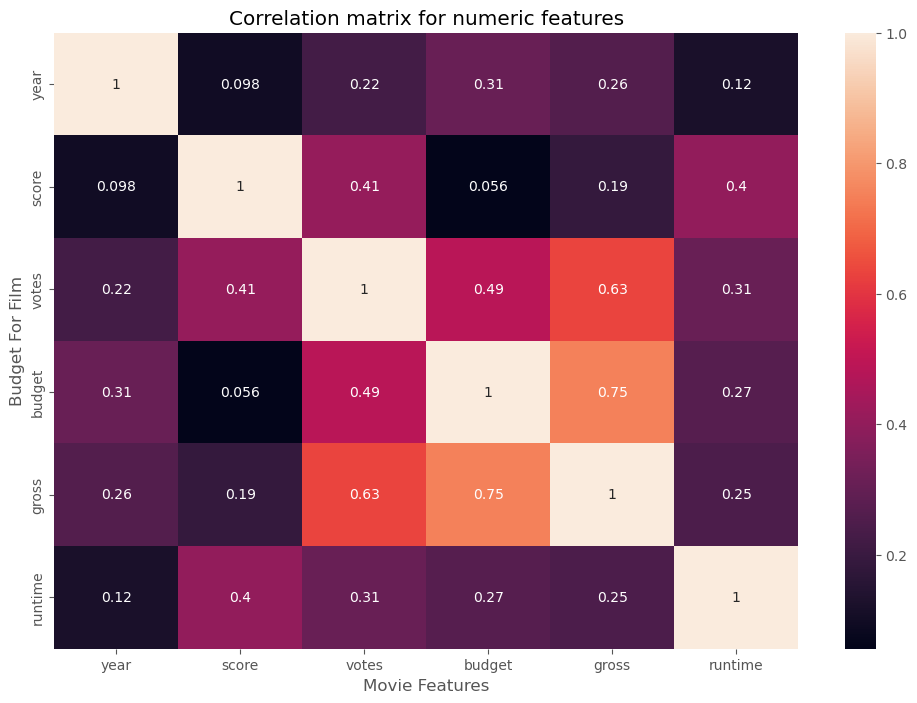

In [65]:
# Create a heatmap visualization of the correlation matrix with annotations
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Budget For Film')
plt.show()

In [76]:
# We can see that some columns like 'name,writer..' are strings, so we need to numerize them.
# Create a copy of the original DataFrame
df_numerized = df
# Loop through each column in the DataFrame
for col_name in df_numerized.columns:
    # Check if the data type of the column is 'object' 
    if(df_numerized[col_name].dtype == 'object'):
         # Convert the categorical column to 'category' data type
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        # Convert the categorical values to numerical codes
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       5      0  2009       696    7.8  1100000.0      1155    1778   
7445   535       5      0  2019       183    8.4   903000.0       162     743   
3045  6896       5      6  1997       704    7.8  1100000.0      1155    1778   
6663  5144       5      0  2015       698    7.8   876000.0      1125    2550   
7244   536       5      0  2018       192    8.4   897000.0       162     743   

      star  country     budget       gross  company  runtime  
5445  2334       55  237000000  2847246203     2253    162.0  
7445  2241       55  356000000  2797501328     1606    181.0  
3045  1595       55  200000000  2201647264     2253    194.0  
6663   524       55  245000000  2069521700     1540    138.0  
7244  2241       55  321000000  2048359754     1606    149.0

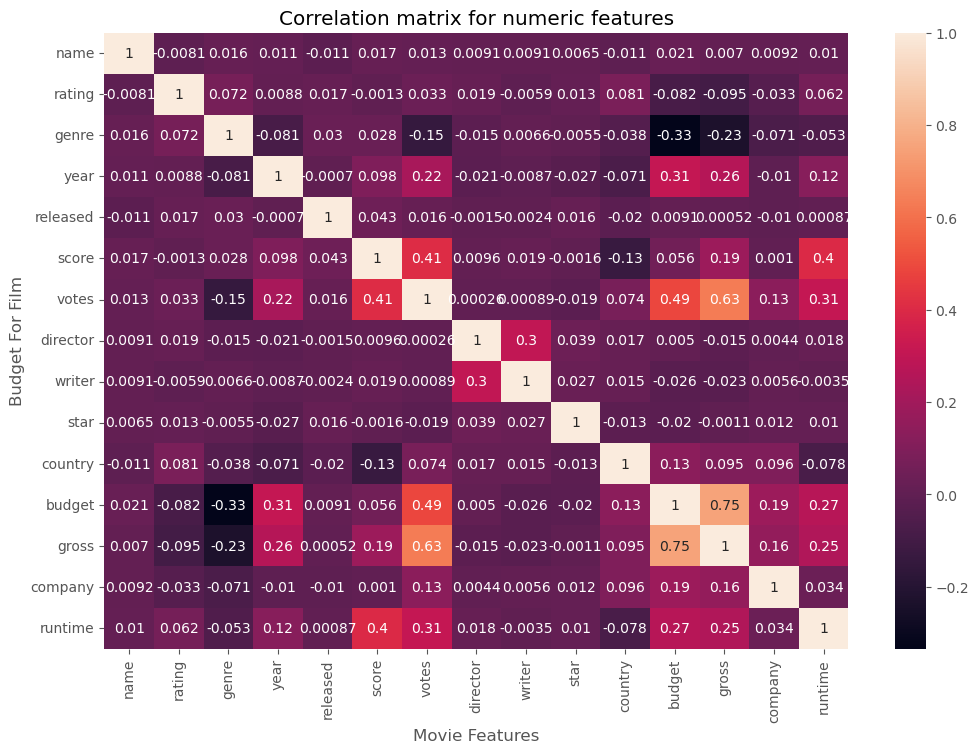

In [67]:
# Now, let's plot the heatmap that we plotted earlier, but now with the data numerized.
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Budget For Film')
plt.show()

In [78]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name      1.000000 -0.008061  0.016334  0.011440 -0.011317  0.017096   
rating   -0.008061  1.000000  0.072423  0.008779  0.016613 -0.001314   
genre     0.016334  0.072423  1.000000 -0.081261  0.029822  0.027965   
year      0.011440  0.008779 -0.081261  1.000000 -0.000695  0.097995   
released -0.011317  0.016613  0.029822 -0.000695  1.000000  0.042788   
score     0.017096 -0.001314  0.027965  0.097995  0.042788  1.000000   
votes     0.013082  0.033225 -0.145307  0.222945  0.016097  0.409182   
director  0.009071  0.019483 -0.015258 -0.020795 -0.001478  0.009559   
writer    0.009062 -0.005921  0.006567 -0.008656 -0.002404  0.019416   
star      0.006465  0.013405 -0.005477 -0.027242  0.015777 -0.001609   
country  -0.010738  0.081244 -0.037615 -0.070938 -0.020427 -0.133348   
budget    0.020544 -0.081939 -0.334021  0.309212  0.009145  0.055665   
gross     0.006979 -0.095450 -0.234297  0.261900  0.000519  0.186392   
company   0.009222 -0.032943 -0.071067 -0.010431 -0.010474  0.001030   
runtime   0.010396  0.062145 -0.052711  0.120811  0.000868  0.399451   

             votes  director    writer      star   country    budget  \
name      0.013082  0.009071  0.009062  0.006465 -0.010738  0.020544   
rating    0.033225  0.019483 -0.005921  0.013405  0.081244 -0.081939   
genre    -0.145307 -0.015258  0.006567 -0.005477 -0.037615 -0.334021   
year      0.222945 -0.020795 -0.008656 -0.027242 -0.070938  0.309212   
released  0.016097 -0.001478 -0.002404  0.015777 -0.020427  0.009145   
score     0.409182  0.009559  0.019416 -0.001609 -0.133348  0.055665   
votes     1.000000  0.000260  0.000892 -0.019282  0.073625  0.486862   
director  0.000260  1.000000  0.299067  0.039234  0.017490  0.004976   
writer    0.000892  0.299067  1.000000  0.027245  0.015343 -0.025911   
star     -0.019282  0.039234  0.027245  1.000000 -0.012998 -0.019952   
country   0.073625  0.017490  0.015343 -0.012998  1.000000  0.131720   
budget    0.486862  0.004976 -0.025911 -0.019952  0.131720  1.000000   
gross     0.632834 -0.014916 -0.022997 -0.001129  0.095325  0.750157   
company   0.133204  0.004404  0.005646  0.012442  0.095548  0.186474   
runtime   0.309212  0.017624 -0.003511  0.010174 -0.078412  0.269510   

             gross   company   runtime  
name      0.006979  0.009222  0.010396  
rating   -0.095450 -0.032943  0.062145  
genre    -0.234297 -0.071067 -0.052711  
year      0.261900 -0.010431  0.120811  
released  0.000519 -0.010474  0.000868  
score     0.186392  0.001030  0.399451  
votes     0.632834  0.133204  0.309212  
director -0.014916  0.004404  0.017624  
writer   -0.022997  0.005646 -0.003511  
star     -0.001129  0.012442  0.010174  
country   0.095325  0.095548 -0.078412  
budget    0.750157  0.186474  0.269510  
gross     1.000000  0.156745  0.245235  
company   0.156745  1.000000  0.034402  
runtime   0.245235  0.034402  1.000000

In [69]:
# What we want to do now, is to reorganize this numerized data in such a way that we can figure out the variables with high correlation quickly.
correlation_mat = df_numerized.corr()
# Unstack the correlation matrix to get pairs of column names and their corresponding correlation values
corr_pairs = correlation_mat.unstack()
# Display the pairs of column names and their corresponding correlation values
corr_pairs

name      name        1.000000
          rating     -0.008061
          genre       0.016334
          year        0.011440
          released   -0.011317
          score       0.017096
          votes       0.013082
          director    0.009071
          writer      0.009062
          star        0.006465
          country    -0.010738
          budget      0.020544
          gross       0.006979
          company     0.009222
          runtime     0.010396
rating    name       -0.008061
          rating      1.000000
          genre       0.072423
          year        0.008779
          released    0.016613
          score      -0.001314
          votes       0.033225
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.081939
          gross      -0.095450
          company    -0.032943
          runtime     0.062145
genre     name        0.016334
          rating      0.072423
        

In [70]:
# Sort the pairs of column names and their corresponding correlation values in ascending order
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre     budget     -0.334021
budget    genre      -0.334021
gross     genre      -0.234297
genre     gross      -0.234297
          votes      -0.145307
votes     genre      -0.145307
country   score      -0.133348
score     country    -0.133348
rating    gross      -0.095450
gross     rating     -0.095450
budget    rating     -0.081939
rating    budget     -0.081939
year      genre      -0.081261
genre     year       -0.081261
runtime   country    -0.078412
country   runtime    -0.078412
genre     company    -0.071067
company   genre      -0.071067
country   year       -0.070938
year      country    -0.070938
runtime   genre      -0.052711
genre     runtime    -0.052711
country   genre      -0.037615
genre     country    -0.037615
company   rating     -0.032943
rating    company    -0.032943
year      star       -0.027242
star      year       -0.027242
writer    budget     -0.025911
budget    writer     -0.025911
gross     writer     -0.022997
writer    gross      -0.022997
director

In [71]:
# We want to see the features with the highest correlations
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross     votes       0.632834
votes     gross       0.632834
budget    gross       0.750157
gross     budget      0.750157
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# budget and gross have the highest correlation
# company have low correlation